## 11.1 日期、時間日期型態以及工具

In [27]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [4]:
from datetime import datetime

now = datetime.now()
now

datetime.datetime(2021, 11, 2, 20, 56, 53, 937475)

In [6]:
now.year, now.month, now.day

(2021, 11, 2)

In [7]:
# 時間差: timedelta
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24,  8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [10]:
delta.days, delta.seconds

(926, 56700)

In [19]:
# 時間位移: datetime +(-) timedelta
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [20]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### 字串和時間日期轉換

In [22]:
# 時間轉成字串
stamp = datetime(2011, 1, 3)
str(stamp), stamp.strftime('%Y-%m-%d')

('2011-01-03 00:00:00', '2011-01-03')

In [23]:
# 字串轉成日期
value = '2011-01-03'

datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [24]:
# 字串轉成日期
datestrs = ['7/6/2011', '8/6/2011']

[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [27]:
# 字串拆解日期- dateutil - parser.parse
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [28]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [29]:
# 日期寫在月份前面
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [30]:
# pandas使用日期陣列
import pandas as pd
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [31]:
# 處理被視為遺失值的值
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [32]:
idx[2]

NaT

In [33]:
pd.isnull(idx)

array([False, False,  True])

## 11.2 時間序列基本概念

In [2]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), 
         datetime(2011, 1, 7), datetime(2011, 1, 8), 
         datetime(2011,1, 10), datetime(2011, 1, 12)]

In [5]:
import numpy as np
import pandas as pd
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -2.435188
2011-01-05   -0.553403
2011-01-07    0.708294
2011-01-08   -1.689811
2011-01-10    0.615552
2011-01-12    1.776200
dtype: float64

In [41]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [42]:
ts + ts[::2]   # ::2 --> 每隔 2個元素做選取

2011-01-02    0.827233
2011-01-05         NaN
2011-01-07   -0.812149
2011-01-08         NaN
2011-01-10   -1.120092
2011-01-12         NaN
dtype: float64

In [46]:
ts.index.dtype    # 資料型態:Numpy 的 datetime64 ； 精確度:微秒

dtype('<M8[ns]')

In [48]:
stamp = ts.index[0]
stamp             # 取回的資料: pandas 的 Timestamp

Timestamp('2011-01-02 00:00:00')

### 索引、選取和相減

In [6]:
stamp = ts.index[2]
stamp

Timestamp('2011-01-07 00:00:00')

In [7]:
ts[stamp]

0.7082936010715086

In [8]:
ts['1/10/2011']

0.6155521097312464

In [9]:
ts['20110110']

0.6155521097312464

In [10]:
# 選取資料切片
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01   -0.721923
2000-01-02   -1.030992
2000-01-03    0.230914
2000-01-04   -0.534521
2000-01-05    0.771338
                ...   
2002-09-22   -0.092284
2002-09-23   -1.976476
2002-09-24   -0.805899
2002-09-25   -2.034389
2002-09-26    0.560733
Freq: D, Length: 1000, dtype: float64

In [11]:
longer_ts['2001']

2001-01-01   -1.165143
2001-01-02    1.247136
2001-01-03   -0.890946
2001-01-04   -1.103620
2001-01-05    0.029988
                ...   
2001-12-27   -1.426795
2001-12-28   -1.258234
2001-12-29   -0.608596
2001-12-30    0.287413
2001-12-31   -0.012071
Freq: D, Length: 365, dtype: float64

In [12]:
longer_ts['2001-05']

2001-05-01    1.489671
2001-05-02   -0.522258
2001-05-03   -1.866674
2001-05-04    0.250285
2001-05-05    1.655474
2001-05-06    1.101517
2001-05-07    0.820071
2001-05-08    0.429065
2001-05-09   -0.580830
2001-05-10    0.094349
2001-05-11   -1.749111
2001-05-12   -0.928305
2001-05-13    0.424724
2001-05-14    0.038743
2001-05-15    0.360357
2001-05-16   -0.647105
2001-05-17   -2.059497
2001-05-18    0.269161
2001-05-19   -2.202685
2001-05-20   -0.414120
2001-05-21   -2.410713
2001-05-22   -0.202879
2001-05-23    1.019763
2001-05-24    0.179787
2001-05-25   -0.129806
2001-05-26   -2.253232
2001-05-27    0.195005
2001-05-28   -0.410824
2001-05-29    1.523333
2001-05-30   -2.248106
2001-05-31   -0.712723
Freq: D, dtype: float64

In [13]:
# 利用datetime物件作切片
ts[datetime(2011, 1, 7):]

2011-01-07    0.708294
2011-01-08   -1.689811
2011-01-10    0.615552
2011-01-12    1.776200
dtype: float64

In [14]:
# 利用時間截記切掉不屬於該期間的資料
ts

2011-01-02   -2.435188
2011-01-05   -0.553403
2011-01-07    0.708294
2011-01-08   -1.689811
2011-01-10    0.615552
2011-01-12    1.776200
dtype: float64

In [15]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.708294
2011-01-08   -1.689811
2011-01-10    0.615552
dtype: float64

In [16]:
# truncate: 做兩個日期間的切片
ts.truncate(after='1/9/2011')

2011-01-02   -2.435188
2011-01-05   -0.553403
2011-01-07    0.708294
2011-01-08   -1.689811
dtype: float64

In [18]:
# 也可用在 DateFrame
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [22]:
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,-0.051796,0.577809,-1.001923,0.516136
2000-01-12,0.297804,-0.718448,-0.359323,0.066108
2000-01-19,0.923435,0.576909,-0.166146,0.123563
2000-01-26,0.689915,0.556961,-0.932490,1.195208
2000-02-02,-0.046690,1.621740,0.498755,-0.238306
...,...,...,...,...
2001-10-31,0.820160,1.059085,2.081178,0.906344
2001-11-07,-0.035183,0.073224,0.179023,1.332004
2001-11-14,-0.810324,2.129532,-1.691720,0.422241
2001-11-21,0.000792,-1.598531,1.573085,0.874501


In [23]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-1.638944,-0.812267,0.099187,0.815785
2001-05-09,-1.753691,-0.055188,-0.682679,-0.505264
2001-05-16,-0.844090,-0.316166,-0.005764,1.418915
2001-05-23,-0.730874,-0.036289,0.379574,-0.471690
2001-05-30,-1.374204,1.148380,0.685869,-0.724069


### 有重複索引的時間序列

In [25]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-02', '2000-01-02',
               '2000-01-03'],
              dtype='datetime64[ns]', freq=None)

In [26]:
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [29]:
# 查找重複值
dup_ts.index.is_unique

False

In [30]:
dup_ts['1/3/2000'] # 沒有重複

4

In [31]:
dup_ts['1/2/2000'] # 重複

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [32]:
# 用時間截記的資料作聚合
grouped = dup_ts.groupby(level=0)

In [33]:
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [34]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 11.3 日期區間、頻率和位移

In [35]:
ts

2011-01-02   -2.435188
2011-01-05   -0.553403
2011-01-07    0.708294
2011-01-08   -1.689811
2011-01-10    0.615552
2011-01-12    1.776200
dtype: float64

In [ ]:
# 將沒有特定規律的樣本時間序列 轉換為以每日固定頻率
resampler = ts.resample('D')   # 'D'表示頻率為每天
resampler

### 產生區間日期

In [39]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [41]:
pd.date_range(start='2012-04-01', periods=20)   # 產生以每日為單位的時間截記

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [42]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [43]:
# 時間頻率: BM
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [44]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [45]:
# 指定開始/結束的時間，且把時間"統一"為午夜
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### 頻率和資料位移

In [46]:
from pandas.tseries.offsets import Hour, Minute

In [47]:
hour = Hour()
hour

<Hour>

In [49]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [50]:
# 乘以幾倍, 直接放在基礎頻率前
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')  # 小時乘以4倍

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [51]:
# 加法合併
Hour(2) + Minute(30)

<150 * Minutes>

In [52]:
# 頻率字串代碼
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

### 每月的第幾週的星期幾

In [3]:
import pandas as pd
import numpy as np

In [1]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

In [2]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### 移動(開頭或結尾)資料

In [8]:
ts = pd.Series(np.random.randn(4), 
               index = pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    0.886377
2000-02-29   -0.306026
2000-03-31    1.074331
2000-04-30    0.444683
Freq: M, dtype: float64

In [10]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.886377
2000-04-30   -0.306026
Freq: M, dtype: float64

In [11]:
ts.shift(-2)

2000-01-31    1.074331
2000-02-29    0.444683
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [12]:
ts.shift(2, freq='M')  # 傳入頻率，會產生新的時間截記，不會減少資料

2000-03-31    0.886377
2000-04-30   -0.306026
2000-05-31    1.074331
2000-06-30    0.444683
Freq: M, dtype: float64

In [14]:
ts.shift(3, freq='D')  # 傳入其他頻率

2000-02-03    0.886377
2000-03-03   -0.306026
2000-04-03    1.074331
2000-05-03    0.444683
dtype: float64

In [15]:
ts.shift(1, freq='90T')   # T:分鐘

2000-01-31 01:30:00    0.886377
2000-02-29 01:30:00   -0.306026
2000-03-31 01:30:00    1.074331
2000-04-30 01:30:00    0.444683
dtype: float64

### 用位移量移動日期

In [19]:
from pandas.tseries.offsets import Day, MonthEnd
from datetime import datetime


In [20]:
now = datetime(2011, 11, 17)

In [21]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [22]:
# 用 MonthEnd 等的錨點位移量，第一錨點會向前"捲"到下一個符合頻率規則的日期
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [23]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [24]:
# 指定向前捲或向後捲
offset = MonthEnd()

In [26]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [27]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [29]:
# 資料位移搭配groupby
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -0.455874
2000-01-19   -0.231757
2000-01-23    2.220161
2000-01-27   -0.723548
2000-01-31   -0.450965
2000-02-04    1.095323
2000-02-08   -0.575600
2000-02-12    0.664216
2000-02-16    0.324854
2000-02-20    0.534451
2000-02-24   -0.554303
2000-02-28   -0.329450
2000-03-03   -1.122999
2000-03-07   -1.422995
2000-03-11   -0.880419
2000-03-15   -0.690852
2000-03-19    0.453208
2000-03-23   -1.409736
2000-03-27   -1.486918
2000-03-31    1.397333
Freq: 4D, dtype: float64

In [30]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.071603
2000-02-29    0.165641
2000-03-31   -0.645422
dtype: float64

In [31]:
# 結合上述兩步驟：resample
ts.resample('M').mean()

2000-01-31    0.071603
2000-02-29    0.165641
2000-03-31   -0.645422
Freq: M, dtype: float64

## 11.4 時區

In [1]:
import pytz
import pandas as pd
import numpy as np

In [2]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [4]:
# 取得時區物件
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### 時區本地化及轉換

In [5]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [6]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -1.144308
2012-03-10 09:30:00    0.532686
2012-03-11 09:30:00   -0.244013
2012-03-12 09:30:00   -0.216530
2012-03-13 09:30:00    0.802364
2012-03-14 09:30:00    0.299221
Freq: D, dtype: float64

In [7]:
print(ts.index.tz)

None


In [2]:
# 指定時區
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [8]:
# 將不含時區資訊的資料 轉換為含本地時區資訊的資料
ts

2012-03-09 09:30:00   -1.144308
2012-03-10 09:30:00    0.532686
2012-03-11 09:30:00   -0.244013
2012-03-12 09:30:00   -0.216530
2012-03-13 09:30:00    0.802364
2012-03-14 09:30:00    0.299221
Freq: D, dtype: float64

In [9]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -1.144308
2012-03-10 09:30:00+00:00    0.532686
2012-03-11 09:30:00+00:00   -0.244013
2012-03-12 09:30:00+00:00   -0.216530
2012-03-13 09:30:00+00:00    0.802364
2012-03-14 09:30:00+00:00    0.299221
Freq: D, dtype: float64

In [10]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [11]:
# 時間序列一旦被本地化為某個特定時區後，可使用tz_convert將之轉換為另一個時區
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -1.144308
2012-03-10 04:30:00-05:00    0.532686
2012-03-11 05:30:00-04:00   -0.244013
2012-03-12 05:30:00-04:00   -0.216530
2012-03-13 05:30:00-04:00    0.802364
2012-03-14 05:30:00-04:00    0.299221
Freq: D, dtype: float64

In [13]:
# America/New_York 的時區跨過日光節約時間，先本地化為美東標準時間，再轉成UTC或柏林時間
ts_eastern = ts.tz_localize('America/New_York')

ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -1.144308
2012-03-10 14:30:00+00:00    0.532686
2012-03-11 13:30:00+00:00   -0.244013
2012-03-12 13:30:00+00:00   -0.216530
2012-03-13 13:30:00+00:00    0.802364
2012-03-14 13:30:00+00:00    0.299221
dtype: float64

In [15]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -1.144308
2012-03-10 15:30:00+01:00    0.532686
2012-03-11 14:30:00+01:00   -0.244013
2012-03-12 14:30:00+01:00   -0.216530
2012-03-13 14:30:00+01:00    0.802364
2012-03-14 14:30:00+01:00    0.299221
dtype: float64

In [16]:
# tz_localize 與 tz_convert: 同時是DatetimeIndex的實例方法
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

### 含時區的 Timestamp 物件

In [17]:
stamp = pd.Timestamp('2011-03-12 04:00')

stamp_utc = stamp.tz_localize('UTC')

stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [18]:
# 建立Timestamp時，同步指定時區
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')

stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [19]:
# UTC時間截記，無法轉換(自1970/01/01起算，單位:奈秒)
stamp_utc.value

1299902400000000000

In [20]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [21]:
# DateOffset物件, pandas會盡量配合日光節約轉換
from pandas.tseries.offsets import Hour

In [23]:
# 日光節約前30分鐘
stamp = pd.Timestamp('2012-03-11 01:30', tz='US/Eastern')

print(stamp)
print(stamp + Hour())

2012-03-11 01:30:00-05:00
2012-03-11 03:30:00-04:00


In [24]:
# 離開日光節約前90分鐘
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')

print(stamp)
print(stamp + 2 * Hour())

2012-11-04 00:30:00-04:00
2012-11-04 01:30:00-05:00


### 不同時區的操作

In [25]:
# 不同時區兩個時間序列合併，會變成 UTC
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')

ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -0.262001
2012-03-08 09:30:00    0.730989
2012-03-09 09:30:00   -0.307725
2012-03-12 09:30:00    0.535686
2012-03-13 09:30:00   -0.169744
2012-03-14 09:30:00   -0.302296
2012-03-15 09:30:00    0.402737
2012-03-16 09:30:00   -1.707926
2012-03-19 09:30:00    1.295897
2012-03-20 09:30:00    0.575983
Freq: B, dtype: float64

In [26]:
ts1 = ts[:7].tz_localize('Europe/London')

ts2 = ts1[2:].tz_convert('Europe/Moscow')

result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

In [27]:
ts1

2012-03-07 09:30:00+00:00   -0.262001
2012-03-08 09:30:00+00:00    0.730989
2012-03-09 09:30:00+00:00   -0.307725
2012-03-12 09:30:00+00:00    0.535686
2012-03-13 09:30:00+00:00   -0.169744
2012-03-14 09:30:00+00:00   -0.302296
2012-03-15 09:30:00+00:00    0.402737
dtype: float64

In [28]:
ts2

2012-03-09 13:30:00+04:00   -0.307725
2012-03-12 13:30:00+04:00    0.535686
2012-03-13 13:30:00+04:00   -0.169744
2012-03-14 13:30:00+04:00   -0.302296
2012-03-15 13:30:00+04:00    0.402737
dtype: float64

## 11.5 週期和週期運算

In [7]:
import pandas as pd
import numpy as np

In [2]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [3]:
p + 5

Period('2012', 'A-DEC')

In [4]:
p - 2

Period('2005', 'A-DEC')

In [5]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [6]:
# 產生有規律的時間區間
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [8]:
# 能儲存一排時間區間物件，並做為軸index
pd.Series(np.random.randn(6), index=rng)

2000-01    0.392155
2000-02   -1.641759
2000-03   -0.288959
2000-04    0.716547
2000-05    1.564050
2000-06   -1.772192
Freq: M, dtype: float64

In [9]:
# 字串也能建立 PeriodIndex 物件
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

### 時間區間頻率轉換

In [11]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [12]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [13]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [14]:
p

Period('2007', 'A-DEC')

In [15]:
# 例：財務年度
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [16]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [17]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [18]:
# 高頻率>低頻率
p = pd.Period('Aug-2007', 'M')
p

Period('2007-08', 'M')

In [19]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [20]:
p.asfreq('A-JUL')

Period('2008', 'A-JUL')

In [21]:
p.asfreq('A-AUG')

Period('2007', 'A-AUG')

In [23]:
# PeriodIndex 轉換
rng = pd.period_range('2006', '2009', freq='A-DEC')
rng

PeriodIndex(['2006', '2007', '2008', '2009'], dtype='period[A-DEC]')

In [24]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    1.027815
2007   -0.052088
2008    0.145395
2009    0.537414
Freq: A-DEC, dtype: float64

In [25]:
ts.asfreq('M', how='start')

2006-01    1.027815
2007-01   -0.052088
2008-01    0.145395
2009-01    0.537414
Freq: M, dtype: float64

In [26]:
# 以該年的最後一個週間日為準
ts.asfreq('B', how='end')

2006-12-29    1.027815
2007-12-31   -0.052088
2008-12-31    0.145395
2009-12-31    0.537414
Freq: B, dtype: float64

### 季度期間頻率

In [27]:
p = pd.Period('2012Q4', freq='Q-JAN')  # 財務年度的結束月在"一月"
p

Period('2012Q4', 'Q-JAN')

In [28]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [29]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [30]:
# 期間的算術運算
# 例：從一個季度期間取得從第二天的下午4點開始 ~ 季度最後一個週間日  的時間截記
p4pm = (p.asfreq('B', 'e') -1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [31]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [33]:
# 利用 period_range 產生多個季度期間
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
rng

PeriodIndex(['2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4'], dtype='period[Q-JAN]')

In [35]:
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [37]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
new_rng

PeriodIndex(['2010-10-28 16:00', '2011-01-28 16:00', '2011-04-28 16:00',
             '2011-07-28 16:00', '2011-10-28 16:00', '2012-01-30 16:00'],
            dtype='period[T]')

In [38]:
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### 時間截記和期間轉換

In [39]:
# 以時間截記當成 index ，可以用 to_period 轉換為期間
rng = pd.date_range('2000-01-01', periods=3, freq='M')
rng

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

In [40]:
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31    1.008049
2000-02-29    1.099730
2000-03-31   -1.918744
Freq: M, dtype: float64

In [42]:
pts = ts.to_period()
pts

2000-01    1.008049
2000-02    1.099730
2000-03   -1.918744
Freq: M, dtype: float64

In [43]:
# 指定頻率
rng = pd.date_range('1/29/2000', periods=6, freq='D')
rng

DatetimeIndex(['2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03'],
              dtype='datetime64[ns]', freq='D')

In [44]:
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    0.442210
2000-01-30   -1.405887
2000-01-31   -2.514854
2000-02-01   -1.650363
2000-02-02   -0.265335
2000-02-03   -1.733344
Freq: D, dtype: float64

In [45]:
ts2.to_period('M')

2000-01    0.442210
2000-01   -1.405887
2000-01   -2.514854
2000-02   -1.650363
2000-02   -0.265335
2000-02   -1.733344
Freq: M, dtype: float64

In [47]:
# 轉換為時間截記: to_timestamp
pts = ts2.to_period()
pts

2000-01-29    0.442210
2000-01-30   -1.405887
2000-01-31   -2.514854
2000-02-01   -1.650363
2000-02-02   -0.265335
2000-02-03   -1.733344
Freq: D, dtype: float64

In [48]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    0.442210
2000-01-30 23:59:59.999999999   -1.405887
2000-01-31 23:59:59.999999999   -2.514854
2000-02-01 23:59:59.999999999   -1.650363
2000-02-02 23:59:59.999999999   -0.265335
2000-02-03 23:59:59.999999999   -1.733344
Freq: D, dtype: float64

### 從陣列建立 PeriodIndex

In [50]:
data = pd.read_csv('macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [51]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [52]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [53]:
# 利用 PeriodIndex 合併年度與季度
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [54]:
data.index = index
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


## 11.6 重新取樣與頻率轉換

In [3]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01   -0.823157
2000-01-02   -0.489219
2000-01-03    2.012395
2000-01-04    1.539782
2000-01-05   -0.502825
                ...   
2000-04-05    0.250023
2000-04-06   -1.368357
2000-04-07   -0.900594
2000-04-08   -1.041550
2000-04-09   -0.359519
Freq: D, Length: 100, dtype: float64

In [4]:
ts.resample('M').mean()

2000-01-31    0.214971
2000-02-29   -0.214870
2000-03-31    0.267759
2000-04-30   -0.504057
Freq: M, dtype: float64

In [5]:
ts.resample('M', kind='period').mean()

2000-01    0.214971
2000-02   -0.214870
2000-03    0.267759
2000-04   -0.504057
Freq: M, dtype: float64

### 降低取樣頻率

In [6]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [8]:
# 將資料聚合成五分鐘一段,將每組總和計算出來
ts.resample('5min', closed='left').sum()  # 分組的"左端"會被包含

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [9]:
ts.resample('5min', closed='right').sum()  # 分組的"右端"會被包含

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [10]:
ts.resample('5min', closed='right', label='right').sum()  #label='right' -->將標籤改為每組右端點

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [11]:
# 位移 index
ts.resample('5min', closed='right', label='right', loffset='-1s').sum()

C:\Users\a8803\AppData\Local\Temp/ipykernel_15732/3278506300.py:2: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min', closed='right', label='right', loffset='-1s').sum()


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

### 開始-最大-最小-結束(OHLC)重新取樣

In [14]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### 提高取樣和內插值

In [15]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.231024,-0.255225,0.286134,-0.024731
2000-01-12,1.210648,-0.665286,0.015505,-0.341303


In [16]:
# 將資料從低頻率轉為高頻率，沒有聚合動作 --> 缺口填入遺失值
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.231024,-0.255225,0.286134,-0.024731
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.210648,-0.665286,0.015505,-0.341303


In [17]:
# 填充資料: 向前填充
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.231024,-0.255225,0.286134,-0.024731
2000-01-06,0.231024,-0.255225,0.286134,-0.024731
2000-01-07,0.231024,-0.255225,0.286134,-0.024731
2000-01-08,0.231024,-0.255225,0.286134,-0.024731
2000-01-09,0.231024,-0.255225,0.286134,-0.024731
2000-01-10,0.231024,-0.255225,0.286134,-0.024731
2000-01-11,0.231024,-0.255225,0.286134,-0.024731
2000-01-12,1.210648,-0.665286,0.015505,-0.341303


In [18]:
# 填充資料: 向前填充幾個週期
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.231024,-0.255225,0.286134,-0.024731
2000-01-06,0.231024,-0.255225,0.286134,-0.024731
2000-01-07,0.231024,-0.255225,0.286134,-0.024731
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.210648,-0.665286,0.015505,-0.341303


In [20]:
# 新資料不與舊資料index重疊
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0.231024,-0.255225,0.286134,-0.024731
2000-01-13,1.210648,-0.665286,0.015505,-0.341303


### 指定期間重新取樣

In [23]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001', freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,0.497862,0.715708,0.512387,-1.162007
2000-02,0.433079,0.593189,-2.063749,-0.564856
2000-03,-1.002251,-1.144736,-1.467316,-0.340004
2000-04,0.830505,-0.885290,0.963513,-1.047699
2000-05,0.185160,2.637840,-0.527285,0.117027


In [24]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.178893,0.080279,-0.328499,-0.298939
2001,-0.176065,0.471495,-0.240664,0.210087


In [25]:
# 提高取樣綠
annual_frame.resample('Q-DEC').ffill()    # Q-DEC:季度，以十二月為年底

,Colorado,Texas,New York,Ohio
2000Q1,0.178893,0.080279,-0.328499,-0.298939
2000Q2,0.178893,0.080279,-0.328499,-0.298939
2000Q3,0.178893,0.080279,-0.328499,-0.298939
2000Q4,0.178893,0.080279,-0.328499,-0.298939
2001Q1,-0.176065,0.471495,-0.240664,0.210087
2001Q2,-0.176065,0.471495,-0.240664,0.210087
2001Q3,-0.176065,0.471495,-0.240664,0.210087
2001Q4,-0.176065,0.471495,-0.240664,0.210087


In [28]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.178893,0.080279,-0.328499,-0.298939
2001Q1,0.178893,0.080279,-0.328499,-0.298939
2001Q2,0.178893,0.080279,-0.328499,-0.298939
2001Q3,0.178893,0.080279,-0.328499,-0.298939
2001Q4,-0.176065,0.471495,-0.240664,0.210087


## 11.7 移動視窗函式

In [2]:
closd_px_all = pd.read_csv('stock_px_2.csv', parse_dates=True, index_col=0)

In [3]:
closd_px = closd_px_all[['AAPL', 'MSFT', 'XOM']]

In [4]:
closd_px = closd_px.resample('B').ffill()

In [8]:
closd_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


<AxesSubplot:>

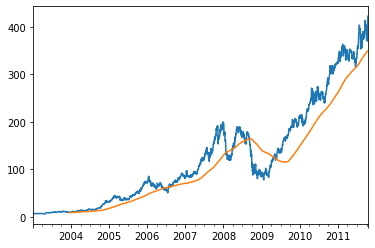

In [11]:
closd_px.AAPL.plot()
closd_px.AAPL.rolling(250).mean().plot()   # rolling: 以250天移動視窗做分組

<AxesSubplot:>

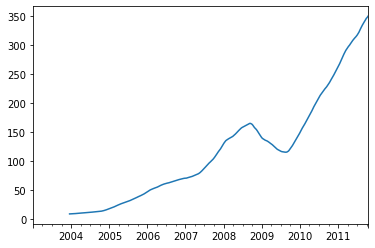

In [10]:
# closd_px.AAPL.rolling(250).mean().plot()  # 改成畫在一起

In [12]:
# 有遺失值
appl_std250 = closd_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<AxesSubplot:>

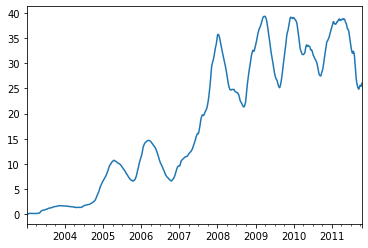

In [13]:
appl_std250.plot()

In [15]:
# 計算擴大視窗平均值：expanding
expanding_mean = appl_std250.expanding().mean()
expanding_mean

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    18.521201
2011-10-11    18.524272
2011-10-12    18.527385
2011-10-13    18.530554
2011-10-14    18.533823
Freq: B, Name: AAPL, Length: 2292, dtype: float64

<AxesSubplot:>

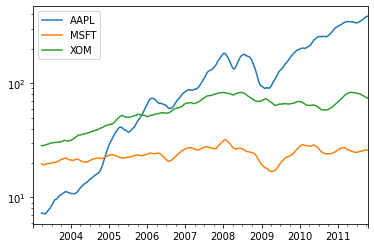

In [16]:
# DataFrame 呼叫移動視窗函式，會對每個欄位套用運算
closd_px.rolling(60).mean().plot(logy=True)   # Y軸log

In [18]:
# 計算20日移動平均
closd_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### 指數加權函式

In [21]:
# 衰變因子(decay factor)，讓比較近的觀測值有較高的加權權重

# 計算指數加權：rolling、expanding、ewm
aapl_px = closd_px.AAPL['2006':'2007']

In [22]:
ma60 = aapl_px.rolling(30, min_periods=20).mean()

In [23]:
ewma60 = aapl_px.ewm(span=30).mean()   # 跨度span

<AxesSubplot:>

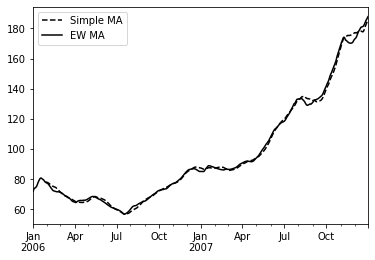

In [34]:
ma60.plot(style='k--', label='Simple MA', legend=True)
ewma60.plot(style='k-', label='EW MA', legend=True)

### 二元移動視窗函式

In [ ]:
# 相關係數 & 共變異數

In [36]:
spx_px = closd_px_all['SPX']

In [37]:
spx_rets = spx_px.pct_change()

In [38]:
returns = closd_px.pct_change()

<AxesSubplot:>

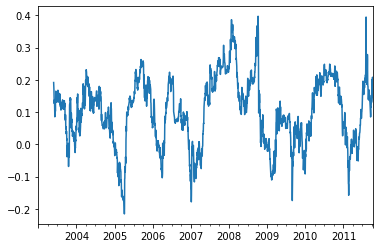

In [39]:
# 聚合函式corr
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_px)
corr.plot()  # 相關係數

<AxesSubplot:>

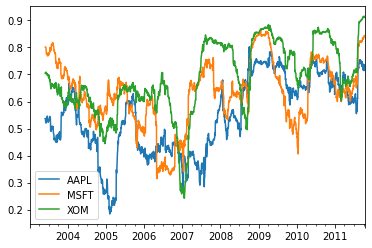

In [40]:
# 計算很多支股票對 標普500 的各別相關係數
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### 使用者自定移動視窗函式

In [41]:
# apply: 在移動視窗中套用自己的函式
from scipy.stats import percentileofscore

In [42]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)  # 計算樣本百分比，並且知道該樣本的百分比等級為何。

In [43]:
result = returns.AAPL.rolling(250).apply(score_at_2percent)

<AxesSubplot:>

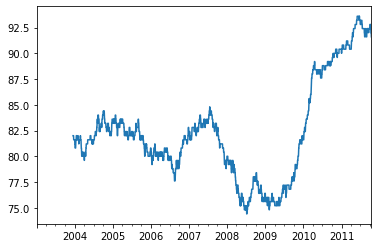

In [44]:
result.plot()